In [19]:
# _*_coding:utf-8_*_

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score


% matplotlib inline

/home/liu/py3venv/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/liu/py3venv/lib/python3.5/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/home/liu/py3venv/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationW

In [63]:
df_train = pd.read_excel('/home/liu/mysoft/pycharm/project/quantist/quantist/example/forex/xauusd.xlsx')
df_train.head()

,day,close,open,high,low
0,1979-12-27,515.5,517.00,517.0,513.00
1,1979-12-28,517.8,516.00,517.8,510.40
2,1979-12-31,533.0,527.88,534.5,527.88
3,1980-01-02,575.5,562.50,577.0,558.00
4,1980-01-03,625.0,627.00,640.0,603.00


In [64]:
df_train.dtypes

day      datetime64[ns]
close           float64
open            float64
high            float64
low             float64
dtype: object

In [77]:
df_train.shape

(9638, 5)

In [66]:
df_train.count()

day      9638
close    9638
open     9638
high     9638
low      9638
dtype: int64

In [67]:
df_train.describe()

,close,open,high,low
count,9638.000000,9638.000000,9638.000000,9638.000000
mean,631.075557,631.203932,634.170516,627.911425
std,416.030197,416.140563,418.882578,413.067194
min,253.000000,252.900000,252.900000,252.500000
25%,350.625000,350.700000,351.200000,349.800000
50%,406.050000,406.000000,407.350000,404.850000
75%,901.525000,902.950000,910.225000,891.675000
max,1888.700000,1909.000000,1911.600000,1864.000000


In [78]:
type(df_train.day)

In [79]:
df_train['month'] = pd.DatetimeIndex(df_train.day).month
df_train['day'] = pd.DatetimeIndex(df_train.day).dayofweek
df_train['hour'] = pd.DatetimeIndex(df_train.day).hour

df_train.head()

,day,close,open,high,low,month,hour
0,3,515.5,517.00,517.0,513.00,12,0
1,4,517.8,516.00,517.8,510.40,12,0
2,0,533.0,527.88,534.5,527.88,12,0
3,2,575.5,562.50,577.0,558.00,1,0
4,3,625.0,627.00,640.0,603.00,1,0


In [84]:
df_train_target = df_train['close'].values
df_train_data = df_train.drop(['close', 'day'],axis=1).values
print(df_train_data[:5])
print(df_train_data.shape)
print(df_train_target[:5])
print(df_train_target.shape)
# print(df_train_target.isnull)

[[ 517.    517.    513.     12.      0.  ]
 [ 516.    517.8   510.4    12.      0.  ]
 [ 527.88  534.5   527.88   12.      0.  ]
 [ 562.5   577.    558.      1.      0.  ]
 [ 627.    640.    603.      1.      0.  ]]
(9638, 5)
[ 515.5  517.8  533.   575.5  625. ]
(9638,)


In [85]:
cv = cross_validation.ShuffleSplit(len(df_train_data),n_iter=3,test_size=0.2,random_state=0)

In [86]:
df_train_data[train]

array([[ 405. ,  406.5,  399.5,   11. ,    0. ],
       [ 389.5,  389.5,  389.5,   11. ,    0. ],
       [ 374.5,  374.5,  374.5,    1. ,    0. ],
       ..., 
       [ 284.8,  284.8,  284.8,    4. ,    0. ],
       [ 338.3,  339.2,  338.3,   12. ,    0. ],
       [ 386.3,  386.3,  386.3,   11. ,    0. ]])

In [87]:
df_train_target[test]

array([  377.5,   312.4,  1302.6, ...,   270.4,  1333.9,   638.8])

In [75]:
print(len(df_train_target))

9638


In [90]:
# Ridge

print('Ride')
for train, test in cv:
    svc = linear_model.Ridge().fit(df_train_data[train], df_train_target[train])
    print('train score:{0:.3f}, test score:{1:.3f}\n'.format(
        svc.score(df_train_data[train], df_train_target[train]),
        svc.score(df_train_data[test], df_train_target[test])
    ))
    
print('SVM')
for train,test in cv:
    svc = svm.SVR(kernel='rbf', C=10, gamma=.001).fit(df_train_data[train],df_train_target[train])
    print('train score:{0:.3f}, test score:{1:.3f}\n'.format(
        svc.score(df_train_data[train], df_train_target[train]),
        svc.score(df_train_data[test], df_train_target[test])
    ))

print('Random Forest')
for trian, test in cv:
    svc = RandomForestRegressor(n_estimators=100).fit(df_train_data[train],df_train_target[train])
    print('train score:{0:.3f}, test score:{1:.3f}\n'.format(
        svc.score(df_train_data[train], df_train_target[train]),
        svc.score(df_train_data[test], df_train_target[test])
    ))

Ride
train score:1.000, test score:1.000

train score:1.000, test score:1.000

train score:1.000, test score:1.000

SVM


train score:0.945, test score:0.944



train score:0.947, test score:0.932



train score:0.945, test score:0.946

Random Forest


train score:1.000, test score:1.000



train score:1.000, test score:1.000



train score:1.000, test score:1.000



In [92]:
X = df_train_data
y = df_train_target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=0
)

tuned_parameters = [{'n_estimators':[10, 100, 500]}]

scores = ['r2']

for score in scores:
    print(score)
    
    clf = GridSearchCV(RandomForestRegressor(), tuned_parameters,cv=5, scoring=score)
    clf.fit(X_train, y_train)
    
print('Get the params')
print(clf.best_estimator_)
print('')
for params, mean_score, scores in clf.grid_scores_:
    print('%0.3f (+/-%0.03f) for %r' % (mean_score, scores.std()/2, params))
    
"""
0.852 (+/-0.006) for {'n_estimators': 10}
0.862 (+/-0.005) for {'n_estimators': 100}
0.863 (+/-0.006) for {'n_estimators': 500}
"""

r2


Get the params
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

1.000 (+/-0.000) for {'n_estimators': 10}
1.000 (+/-0.000) for {'n_estimators': 100}
1.000 (+/-0.000) for {'n_estimators': 500}


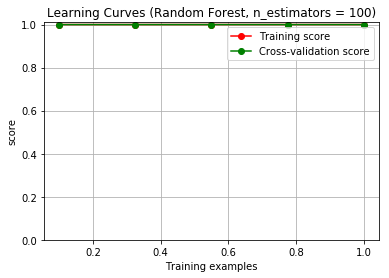

In [96]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('score')
    train_size, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
    
title = 'Learning Curves (Random Forest, n_estimators = 100)'
cv = cross_validation.ShuffleSplit(df_train_data.shape[0], n_iter=10, test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators=100)
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)
plt.show()

In [98]:
for train, test in cv: 
    svc = RandomForestRegressor(n_estimators = 200, max_features=0.6, max_depth=15).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

train score: 1.000, test score: 1.000



train score: 1.000, test score: 1.000



train score: 1.000, test score: 1.000



train score: 1.000, test score: 1.000



train score: 1.000, test score: 1.000



train score: 1.000, test score: 1.000



train score: 1.000, test score: 1.000



train score: 1.000, test score: 1.000



train score: 1.000, test score: 1.000



train score: 1.000, test score: 1.000



In [99]:
corr = df_train[['open', 'high', 'low', 'close']].corr()
corr

,open,high,low,close
open,1.000000,0.999921,0.999889,0.999837
high,0.999921,1.000000,0.999839,0.999903
low,0.999889,0.999839,1.000000,0.999921
close,0.999837,0.999903,0.999921,1.000000


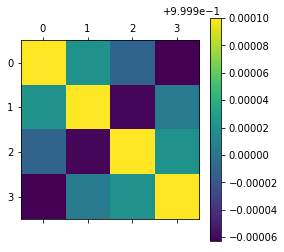

In [100]:
plt.figure()
plt.matshow(corr)
plt.colorbar()
plt.show()